# <center> <b> <h1>   6. Permutation Test </h1></b></center>

In [40]:
import pickle

import pandas as pd
import itertools

import matplotlib.pyplot as plt
from sklearn.model_selection import permutation_test_score
import joblib

PATH_DATASETS = "../2_Data_preparation/2_Split_Raw_Datasets/output/"
PATH_RF_CLFS = "../3.5 Modeling/1_2_hyper_parameter_tunning/output/"

PATH_SIGNIFICANCE = "../3 Modeling/2. Random Forest (significance Score)/output/"

In [7]:
def readCsvs(split):
    datasets = []
    constant1 = 'X_'
    constant2 = '_' + split
    features = ['area', 'meancurv', 'thickness', 'volume']

    for feature in features:
        df = pd.read_csv(PATH_DATASETS + constant1 + feature + constant2 +'.csv', index_col=0)
        datasets.append({'name': feature, 'data': df})
    return datasets

In [22]:
def readClf():
    clfs = []
    features = ['area', 'meancurv', 'thickness', 'volume']
    
    constant = "Random Forest (hyper parameter tuning)_"
    PATH = PATH_RF_CLFS

    for feature in features:
        clf = joblib.load(PATH + constant + feature + '.pkl')
        clfs.append({'name': feature, 'data': clf})
        
    return clfs

In [38]:
def readSignificances():
    df_number_of_features = pd.read_csv(PATH_SIGNIFICANCE 
                                        + "Random Forest Best Number Of Features.csv", index_col=0)
    
    datasets = []
    constant1 = 'Random Forest (AllFeatures - Significance - '
    constant2 = ')'
    features = ['area','meancurv', 'thickness', 'volume']
    number_of_feature = df_number_of_features['quantity'].values

    for feature, number in zip(features, number_of_feature):
        df = pd.read_csv(PATH_SIGNIFICANCE + constant1 + str(int(number)) + constant2 
                         + feature +'.csv', index_col=0)
        datasets.append({'name': feature[0], 'data': df})
    return datasets

# 1. Data Preparing

In [23]:
df_X_tr = readCsvs('train')
df_X_tr[2]['data'].shape

(550, 148)

In [24]:
df_y_train = pd.read_csv(PATH_DATASETS + 'Y_train.csv', index_col = 0)
df_y_train.shape

(550, 1)

# Read Rankings

In [41]:
significances = readSignificances()
significances[0]['data'].head()

,Significance
Name,
rh_G_and_S_cingul-Ant_area,0.020898
lh_S_temporal_sup_area,0.018332
rh_G_temporal_middle_area,0.017275
rh_S_temporal_sup_area,0.015924
lh_G_cuneus_area,0.015085


# Read CLFS

In [25]:
clfs_rf = readClf()

# permutation test with the correct number of areas 

In [44]:
def p_test_with_graph(X, y, clf, n_permutations = 1000, cv = 5):
    
    score, permutation_scores, pvalue = permutation_test_score(
        clf, X, y, scoring="accuracy", cv=cv, n_permutations=n_permutations, n_jobs=-1)

    print("Classification score %s (pvalue : %s)" % (score, pvalue))

    # #############################################################################
    # View histogram of permutation scores
    plt.hist(permutation_scores, 40, label='Permutation scores',
             edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [score], ylim, '--g', linewidth=3,
             label='Classification Score'
             ' (pvalue %s)' % pvalue)
    plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')

    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Score')
    plt.show()

permutation test Random Forest: area

Classification score 0.7054545454545454 (pvalue : 0.000999000999000999)


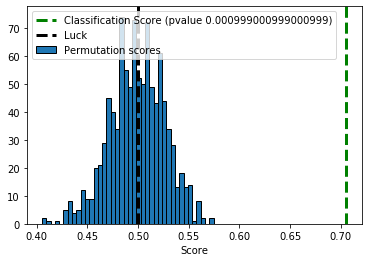

permutation test Random Forest: meancurv

Classification score 0.6872727272727273 (pvalue : 0.000999000999000999)


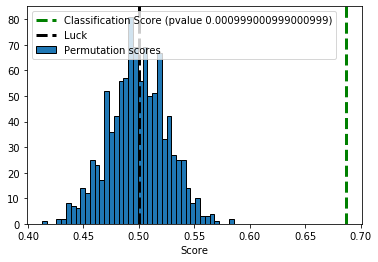

permutation test Random Forest: thickness

Classification score 0.6854545454545455 (pvalue : 0.000999000999000999)


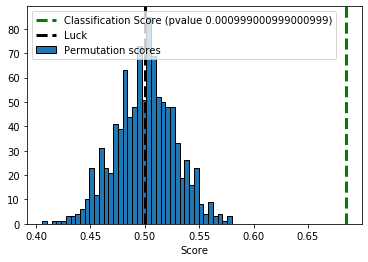

permutation test Random Forest: volume

Classification score 0.74 (pvalue : 0.000999000999000999)


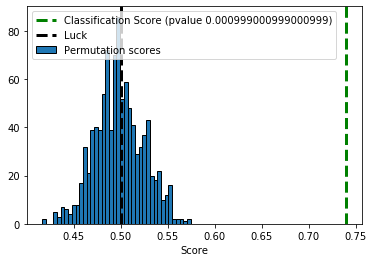

In [45]:
for feature, clf_rf, significance, in zip(df_X_tr, clfs_rf, significances):
    
    data = feature['data']
    name = feature['name']
    
    Rf = clf_rf['data']
    
    print("permutation test Random Forest: " + name+'\n')
    p_test_with_graph(data[significance['data'].index.values].copy(), df_y_train['class'].values, Rf)
    
    